https://medium.com/analytics-vidhya/introduction-to-reinforcement-learning-rl-in-pytorch-c0862989cc0e

In [15]:
# ! pip install pygame

In [86]:
import gym
from IPython import display
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Frozen Lake

In [3]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")

In [4]:
env.observation_space

Discrete(16)

In [5]:
env.action_space

Discrete(4)

In [6]:
env.reset()

(0, {'prob': 1})

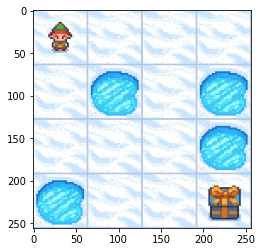

In [10]:
plt.imshow(env.render())

In [20]:
# Non-slippery version
from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
)
env = gym.make('FrozenLakeNotSlippery-v0', render_mode="rgb_array")
env.reset()

(0, {'prob': 1})

In [21]:
# 0 = left, 1 = down, 2 = right, 3 = up

In [46]:
env.step(2)

(15, 0, True, False, {'prob': 1.0})

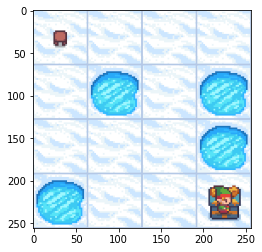

In [47]:
plt.imshow(env.render())

2
2
0
2
1
0


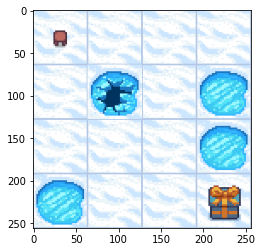

In [58]:
env.reset()
done = False
while not done:
    plt.imshow(env.render())
    action = env.action_space.sample()
    _, _, done, _, _ = env.step(action)
    print(action)
plt.imshow(env.render())

<Figure size 432x288 with 0 Axes>

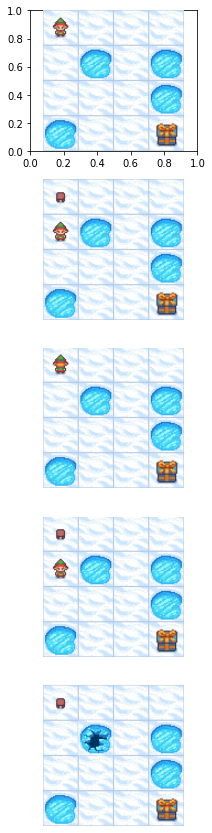

In [83]:
env.reset()
fig = plt.figure()

done = False
renders = []
while not done:
    renders.append(env.render())
    action = env.action_space.sample()
    _, _, done, _, _ = env.step(action)

renders.append(env.render())

fig = plt.figure(figsize=(3, len(renders)*3))
fig.add_subplot(len(renders), 1, 1)

for i, r in enumerate(renders):
    fig.add_subplot(len(renders), 1, i+1)
    plt.axis('off')
    plt.imshow(r)

In [84]:
import numpy as np
#Initialize table with all zeros to be uniform
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [85]:
# Learning parameters
alpha = 0.1
gamma = 0.95
num_episodes = 2000
# array of reward for each episode
rs = np.zeros([num_episodes])

In [89]:
for i in tqdm(range(num_episodes)):
    # Set total reward and time to zero, done to False
    r_sum_i = 0
    t = 0
    done = False
    
    #Reset environment and get first new observation
    s, _ = env.reset()
    done = False
while not done:
    env.render()
    action = env.action_space.sample()
    _, _, done, _ = env.step(action)

    while not done:
        # Choose an action by greedily (with noise) from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1, env.action_space.n)*(1./(i/10+1)))
        
        # Get new state and reward from environment
        s1, r, done, _, _ = env.step(a)
        
        # Update Q-Table with new knowledge
        Q[s,a] = (1 - alpha)*Q[s,a] + alpha*(r + gamma*np.max(Q[s1,:]))
        
        # Add reward to episode total
        r_sum_i += r*gamma**t
        
        # Update state and time
        s = s1
        t += 1
    rs[i] = r_sum_i

  0%|          | 0/2000 [00:00<?, ?it/s]

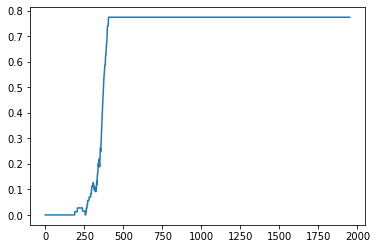

In [90]:
# Sliding window average
r_cumsum = np.cumsum(np.insert(rs, 0, 0)) 
r_cumsum = (r_cumsum[50:] - r_cumsum[:-50]) / 50
# Plot
plt.plot(r_cumsum)
plt.show()

In [91]:
# Print number of times the goal was reached
N = len(rs)//10
num_Gs = np.zeros(10)
for i in range(10):
    num_Gs[i] = np.sum(rs[i*N:(i+1)*N] > 0)
    
print("Rewards: {0}".format(num_Gs))


Rewards: [  0.  26. 198. 200. 200. 200. 200. 200. 200. 200.]


In [93]:
env = gym.make('FrozenLake-v1')

In [96]:
#Initialize table with all zeros to be uniform
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Learning parameters
alpha = 0.1
gamma = 0.95
num_episodes = 2000

# array of reward for each episode
rs = np.zeros([num_episodes])
for i in tqdm(range(num_episodes)):
    # Set total reward and time to zero, done to False
    r_sum_i = 0
    t = 0
    done = False
    
    #Reset environment and get first new observation
    s, _ = env.reset()
    
    while not done:
        # Choose an action by greedily (with noise) from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1, env.action_space.n)*(1./(i/10+1)))
        
        # Get new state and reward from environment
        s1, r, done, _, _ = env.step(a)
        
        # Update Q-Table with new knowledge
        Q[s,a] = (1 - alpha)*Q[s,a] + alpha*(r + gamma*np.max(Q[s1,:]))
        
        # Add reward to episode total
        r_sum_i += r*gamma**t
        
        # Update state and time
        s = s1
        t += 1
    rs[i] = r_sum_i

  0%|          | 0/2000 [00:00<?, ?it/s]

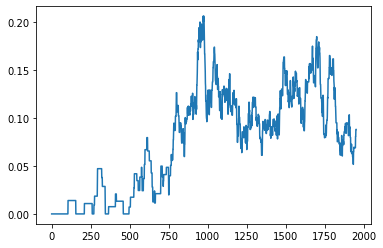

Rewards: [ 1.  5.  6. 13. 63. 67. 54. 66. 67. 55.]


In [97]:
## Plot reward vs episodes
# Sliding window average
r_cumsum = np.cumsum(np.insert(rs, 0, 0)) 
r_cumsum = (r_cumsum[50:] - r_cumsum[:-50]) / 50
# Plot
plt.plot(r_cumsum)
plt.show()
# Print number of times the goal was reached
N = len(rs)//10
num_Gs = np.zeros(10)
for i in range(10):
    num_Gs[i] = np.sum(rs[i*N:(i+1)*N] > 0)
    
print("Rewards: {0}".format(num_Gs))

# Cart Pole

In [115]:
env = gym.make('CartPole-v1',  render_mode="rgb_array")

In [116]:
env.observation_space

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)

In [117]:
env.action_space

Discrete(2)

In [118]:
env.reset()

(array([-0.0176229 ,  0.02389677, -0.01355677, -0.01199402], dtype=float32),
 {})

<Figure size 432x288 with 0 Axes>

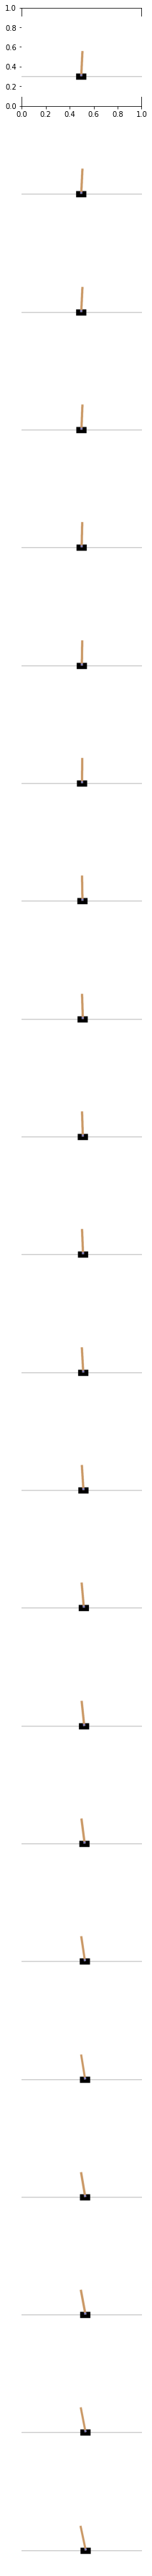

In [119]:
env.reset()
renders = []
fig = plt.figure()

done = False
while not done:
    renders.append(env.render())
    action = env.action_space.sample()
    if not done:
        _, _, done, _, _ = env.step(action)

renders.append(env.render())

fig = plt.figure(figsize=(3, len(renders)*3))
fig.add_subplot(len(renders), 1, 1)

for i, r in enumerate(renders):
    fig.add_subplot(len(renders), 1, i+1)
    plt.axis('off')
    plt.imshow(r)

## DQL 

In [121]:
from collections import deque
import random
import math
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [155]:
class DQN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 24)
        self.fc2 = nn.Linear(24, 48)
        self.fc3 = nn.Linear(48, 2)
        
    def forward(self, x):        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [165]:
class DQNCartPoleSolver:
    def __init__(self, n_episodes=1000, n_win_ticks=195, max_env_steps=None, gamma=1.0, epsilon=1.0, epsilon_min=0.01, epsilon_log_decay=0.995, alpha=0.01, alpha_decay=0.01, batch_size=64, monitor=False, quiet=False):
        self.memory = deque(maxlen=100000)
        self.env = gym.make('CartPole-v1',  render_mode="rgb_array")
        if monitor: self.env = gym.wrappers.Monitor(self.env, '../data/cartpole-1', force=True)
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_log_decay
        self.alpha = alpha
        self.alpha_decay = alpha_decay
        self.n_episodes = n_episodes
        self.n_win_ticks = n_win_ticks
        self.batch_size = batch_size
        self.quiet = quiet
        if max_env_steps is not None: 
            self.env._max_episode_steps = max_env_steps

        self.dqn = DQN()
        self.criterion = torch.nn.MSELoss()
        self.opt = torch.optim.Adam(self.dqn.parameters(), lr=0.01)
        
    def preprocess_state(self, state):
        return torch.tensor(np.reshape(state, [1, 4]), dtype=torch.float32) 
    
    def get_epsilon(self, t):
        return max(self.epsilon_min, min(self.epsilon, 1.0 - math.log10((t + 1) * self.epsilon_decay)))
    
    def choose_action(self, state, epsilon):
        if (np.random.random() <= epsilon):
            return self.env.action_space.sample() 
        else:
            with torch.no_grad():
                return torch.argmax(self.dqn(state)).numpy()
    def remember(self, state, action, reward, next_state, done):
            reward = torch.tensor(reward)
            self.memory.append((state, action, reward, next_state, done))

    def replay(self, batch_size):
        y_batch, y_target_batch = [], []
        minibatch = random.sample(self.memory, min(len(self.memory), batch_size))
        for state, action, reward, next_state, done in minibatch:
            y = self.dqn(state)
            y_target = y.clone().detach()
            with torch.no_grad():
                y_target[0][action] = reward if done else reward + self.gamma * torch.max(self.dqn(next_state)[0])
            y_batch.append(y[0])
            y_target_batch.append(y_target[0])

        y_batch = torch.cat(y_batch)
        y_target_batch = torch.cat(y_target_batch)

        self.opt.zero_grad()
        loss = self.criterion(y_batch, y_target_batch)
        loss.backward()
        self.opt.step()        

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def run(self):
        scores = deque(maxlen=100)
        renders = []
        for e in range(self.n_episodes):
            state = self.preprocess_state(self.env.reset()[0])
            done = False
            i = 0
            while not done:
                if e % 100 == 0 and not self.quiet:
                    renders.append(self.env.render())
                action = self.choose_action(state, self.get_epsilon(e))
                next_state, reward, done, _, _ = self.env.step(action)
                next_state = self.preprocess_state(next_state)
                self.remember(state, action, reward, next_state, done)
                state = next_state
                i += 1
                scores.append(i)
            mean_score = np.mean(scores)
            if mean_score >= self.n_win_ticks and e >= 100:
                if not self.quiet: 
                    print('Ran {} episodes. Solved after {} trials 🍾'.format(e, e - 100))
                    renders.append(env.render())
                    return e - 100, renders
            if e % 100 == 0 and not self.quiet:
                print('[Episode {}] - Mean survival time over last 100 episodes was {} ticks.'.format(e, mean_score))

            self.replay(self.batch_size)

        if not self.quiet: 
            print('Did not solve after {} episodes      😞'.format(e))
        
        renders.append(env.render())
        return e, renders

[Episode 0] - Mean survival time over last 100 episodes was 15.0 ticks.
[Episode 100] - Mean survival time over last 100 episodes was 14.17 ticks.
[Episode 200] - Mean survival time over last 100 episodes was 31.03 ticks.
Ran 297 episodes. Solved after 197 trials 🍾


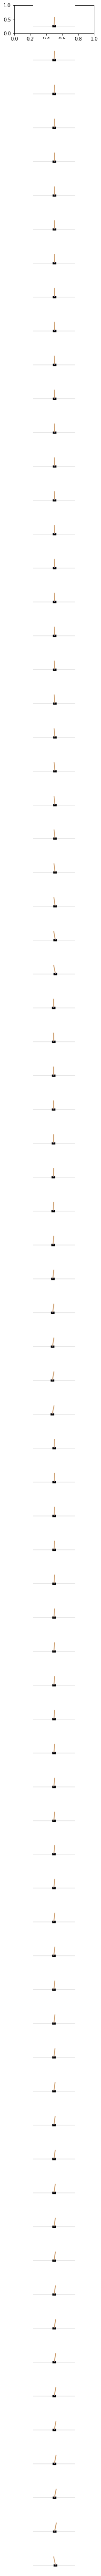

In [167]:
if __name__ == '__main__':
    fig = plt.figure(figsize=(3, len(renders)*3))

    agent = DQNCartPoleSolver()
    e, renders = agent.run()
    fig.add_subplot(len(renders), 1, 1)
        
    for i, r in enumerate(renders):
        fig.add_subplot(len(renders), 1, i+1)
        plt.axis('off')
        plt.imshow(r)